# Simple 1010 Pattern

Make Your First GAN With PyTorch, 2020

In [2]:
# import libraries

import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random
import numpy

## 数据构造函数

#### 真实数据

In [3]:
# function to generate real data

def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)])
    return real_data

In [4]:
generate_real()

tensor([0.8459, 0.0535, 0.9463, 0.0367])

#### 随机数据：假数据

In [5]:
# function to generate uniform random data

def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [6]:
generate_random(4)

tensor([0.1927, 0.1229, 0.7304, 0.6235])

## 鉴别器神经网络

In [7]:
# discriminator class

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        # calculate loss
        loss = self.loss_function(outputs, targets)
        print('outputs: ',outputs)
        print('targets: ',targets)
        
        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

## 测试鉴别器

In [8]:
# test discriminator can separate real data from random noise

D = Discriminator()

for i in range(10000):
    # real data
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # fake data
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass

outputs:  tensor([0.6962], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6991], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6961], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6984], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6956], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6980], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6949], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6960], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6934], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6916], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6928], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6911], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6929], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6680], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6677], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6639], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6664], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6648], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6663], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6662], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6656], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6681], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6654], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6661], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6639], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6649], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.6170], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6207], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6164], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6199], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6185], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6192], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6195], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6188], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6139], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6183], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6156], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6184], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6183], grad_fn=<Sigmo

outputs:  tensor([0.5988], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5983], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5972], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5974], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5958], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5983], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5950], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5975], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5940], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5977], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5968], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5968], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5973], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5770], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5788], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5750], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5776], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5785], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5771], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5772], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5772], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5777], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5750], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5771], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5736], grad_fn=<Sigmo

outputs:  tensor([0.5615], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5627], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5573], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5623], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5586], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5625], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5577], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5621], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5588], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5619], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5582], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5622], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5623], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5469], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5500], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5482], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5503], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5459], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5496], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5485], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5495], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5424], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5499], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5448], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5497], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5478], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.5377], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5407], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5364], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5406], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5353], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5409], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5328], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5398], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5344], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5397], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5345], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5410], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5378], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.5281], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5298], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5292], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5181], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5283], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5265], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5281], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5209], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5289], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5221], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5284], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5201], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5287], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.5190], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5227], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5205], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5230], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5131], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5225], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5194], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5236], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5242], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5225], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5144], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5227], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5169], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.5115], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5179], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5117], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5182], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5120], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5185], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5086], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5171], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5141], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5177], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5137], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5171], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<Sigmo

outputs:  tensor([0.5130], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5036], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5124], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5025], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5124], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5056], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5125], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5084], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5120], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5088], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5120], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5121], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5022], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5095], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4995], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5076], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5091], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5015], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5101], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5086], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5099], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5097], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4997], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5078], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4975], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5078], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4984], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5070], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5013], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4998], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5027], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5069], grad_fn=<Sigmo

outputs:  tensor([0.5051], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4962], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5078], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4992], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5065], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5069], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5014], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5057], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5036], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5078], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5030], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5063], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4960], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5062], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4886], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4941], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5053], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5023], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5060], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4959], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5065], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4943], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5045], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4910], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5055], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4904], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5056], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5072], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5038], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4982], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5055], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5004], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5048], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.4984], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5050], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5035], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4980], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5049], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4875], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5061], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4942], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4941], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5051], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4890], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.4903], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4992], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5051], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5012], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5022], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4988], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5030], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4935], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5066], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5044], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4908], grad_fn=<Sigmo

outputs:  tensor([0.4934], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5051], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4880], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5022], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4924], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5051], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5065], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5036], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5048], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4973], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5034], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4924], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5036], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4839], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5026], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5035], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5036], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4903], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5052], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5053], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4967], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5035], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.4945], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5057], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4942], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5058], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4929], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5046], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4943], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5062], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4873], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5055], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4812], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5066], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4904], grad_fn=<Sigmo

outputs:  tensor([0.5043], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4917], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4859], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5065], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5055], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4887], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5068], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4920], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5044], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5004], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5053], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4946], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5002], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5052], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4817], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5061], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5056], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5063], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4947], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5069], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4974], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5069], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4850], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4857], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5074], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5080], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4885], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5039], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4965], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5002], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4985], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5061], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5058], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4889], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5052], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4840], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5069], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4866], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5051], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5009], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5071], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5063], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5064], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4837], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5084], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4912], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5093], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4935], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5077], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4921], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5073], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4873], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4991], grad_fn=<Sigmo

outputs:  tensor([0.5005], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5096], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4894], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5100], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4849], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5084], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4764], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4888], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5085], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4785], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5065], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4766], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5095], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4882], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4943], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4929], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5076], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4849], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5073], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4870], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5078], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5052], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5072], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4839], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4933], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5086], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4991], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5088], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4820], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4929], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5095], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4815], grad_fn=<Sigmo

outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5125], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4939], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5082], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4976], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5122], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4873], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5078], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4796], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5088], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5013], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4854], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5119], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4683], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5139], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4820], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5101], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4930], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5124], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4931], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5143], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4872], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5104], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5080], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.4774], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5090], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4881], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5078], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4690], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4904], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5128], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4810], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4837], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5086], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4925], grad_fn=<Sigmo

outputs:  tensor([0.4685], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5149], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5154], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5042], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5142], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4709], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4738], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5140], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4897], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5147], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4870], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5174], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4856], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5156], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4829], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5157], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4721], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5166], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5096], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5139], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4831], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5160], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4812], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5154], grad_fn=<Sigmo

outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5205], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5092], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5182], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4434], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5129], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4845], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5141], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4765], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5173], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4942], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5119], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5008], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5169], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4978], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4689], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5117], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4771], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5132], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4850], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5190], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4776], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5169], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4722], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5153], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5154], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4865], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5196], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4758], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5133], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4847], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5191], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5053], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5190], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4844], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5179], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5038], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5124], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5157], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4681], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5149], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4904], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5162], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4742], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5213], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4794], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5209], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4596], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5137], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4954], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5245], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4572], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5138], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4959], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5224], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4436], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5178], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5005], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5182], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4917], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5178], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4673], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5245], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4763], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5158], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5270], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4488], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5217], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4628], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5192], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4896], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5203], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4552], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5219], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5275], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4827], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4785], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5236], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4570], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5267], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5167], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5266], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4796], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5211], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4537], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5316], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4796], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5228], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4828], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5231], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4810], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5246], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4679], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5289], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4441], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5257], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4594], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5279], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5051], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5212], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4637], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5273], grad_fn=<Sigmo

outputs:  tensor([0.5305], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4317], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5267], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4657], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5287], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4815], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5233], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4964], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5279], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4890], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5318], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4351], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5273], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4429], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5373], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4956], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5255], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4584], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5248], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4858], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5306], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4773], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5281], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4982], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5275], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4554], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.5334], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4792], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5266], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4702], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5333], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4909], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5253], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4751], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5378], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4446], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5301], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4834], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5292], grad_fn=<Sigmo

outputs:  tensor([0.5336], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4124], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5387], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5086], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5287], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5257], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4582], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5203], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4616], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5380], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4713], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5353], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5352], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4585], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5374], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5293], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4688], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5385], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4415], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5338], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4847], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5405], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4646], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5326], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5394], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4432], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5388], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4637], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5293], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5227], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5454], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4328], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5435], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4643], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5352], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4226], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5330], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4685], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5384], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4278], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5404], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4782], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5447], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4716], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5435], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4875], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5381], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4570], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5384], grad_fn=<Sigmo

outputs:  tensor([0.4265], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5495], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4588], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5402], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5386], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5459], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4746], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5495], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4598], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5414], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4344], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4425], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5388], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3832], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5383], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4465], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5393], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4927], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5400], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4137], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5371], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4921], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5481], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4424], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5531], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4627], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5602], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3927], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5606], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4403], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5462], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4429], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5362], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4929], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5376], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4135], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5522], grad_fn=<Sigmo

outputs:  tensor([0.4600], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5487], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4523], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5500], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4415], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5337], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4784], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5491], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3900], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5482], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4781], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5478], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4794], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5556], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4569], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5570], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4404], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5447], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4933], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5619], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4667], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5465], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4281], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5503], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4996], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5399], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.4730], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5616], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4678], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5473], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4382], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5573], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4432], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5558], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3936], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5522], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4303], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5593], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4666], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.5634], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4633], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5460], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3968], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5678], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4545], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5406], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4705], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5497], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3990], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5652], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4445], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5593], grad_fn=<Sigmo

outputs:  tensor([0.5584], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3799], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5671], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4050], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5681], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3833], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5456], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3985], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5591], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4005], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5527], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4325], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5761], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5551], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4343], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5756], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5214], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5639], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4893], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5755], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4028], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5619], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4034], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5707], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4505], grad_fn=<Sigmo

outputs:  tensor([0.5779], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4723], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5838], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3747], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5810], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4074], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5651], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3777], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5752], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3995], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5819], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3716], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5727], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4599], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5816], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4251], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5628], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5161], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5718], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3990], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5696], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5366], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5878], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3998], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5741], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3561], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5192], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5910], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4483], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5761], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3625], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5723], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4430], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5827], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4377], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5809], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5478], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5729], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4560], grad_fn=<Sigmo

outputs:  tensor([0.5839], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4058], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5953], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3683], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5685], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5214], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6006], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4496], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5846], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4962], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5888], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4836], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6036], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5866], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2746], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5713], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3773], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5999], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4732], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5925], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3572], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5790], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4560], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5769], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3286], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5733], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5857], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3866], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5730], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4192], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5807], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4292], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5962], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4097], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5982], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3995], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5765], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4954], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4403], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5866], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3683], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5933], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4715], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5942], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4929], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5871], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2965], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6070], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3993], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6174], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3438], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5734], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4800], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5869], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3487], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5978], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3490], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5924], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4672], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5700], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3212], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5906], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4793], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6107], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.5292], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6030], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4084], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6056], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4541], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6023], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4084], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5889], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3896], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5923], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3527], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5791], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4768], grad_fn=<Sigmo

outputs:  tensor([0.5985], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5628], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5803], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4346], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6302], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4302], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6124], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3920], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5917], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4812], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6168], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2990], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6059], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3526], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6022], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4021], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6159], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3661], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6068], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4618], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5906], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3881], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6145], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5413], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5851], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4257], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5778], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3745], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6118], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4787], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6039], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3145], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5962], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3670], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6216], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3552], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6158], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3333], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6082], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5906], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6220], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3522], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6093], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3048], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6131], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3131], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6278], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3501], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6172], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3719], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6066], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4456], grad_fn=<Sigmo

outputs:  tensor([0.3427], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6100], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3204], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6247], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6261], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6168], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4472], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6124], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3146], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6029], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3937], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6416], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4156], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6092], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3047], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6096], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4147], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6416], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2417], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6114], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3412], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6159], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5126], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6013], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4342], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6315], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3537], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6514], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2799], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6171], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2348], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6387], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2971], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6294], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3515], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6105], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4649], grad_fn=<Sigmo

outputs:  tensor([0.6557], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2485], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6440], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5950], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6478], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3638], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6070], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4450], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6207], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6272], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3170], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6307], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6468], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4212], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6527], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4276], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6373], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5751], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6379], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3489], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6332], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3079], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6208], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2909], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6377], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4648], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6439], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3291], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6451], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2512], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6395], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2354], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6366], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1848], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6311], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2924], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6751], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3022], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6677], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1754], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6121], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6716], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3938], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6535], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2596], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6585], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3471], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6516], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3474], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6409], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4570], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6726], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2606], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6547], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1807], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6527], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2943], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6447], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1715], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6375], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4351], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6652], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.2796], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6572], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1312], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6496], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2934], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6480], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2992], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6387], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2430], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6580], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3209], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6473], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3125], grad_fn=<Sigmo

outputs:  tensor([0.3190], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6678], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3339], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6575], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3815], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6917], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4187], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6264], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1997], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6273], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2283], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6801], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6798], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3160], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6561], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1581], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6589], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4274], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6715], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1601], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6816], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4652], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6988], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2808], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6904], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5214], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3854], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6638], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1857], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6680], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1783], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6738], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3015], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6419], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3952], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6480], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2272], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6845], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1812], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3692], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6932], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7088], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2331], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6875], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5801], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6343], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5594], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6466], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2716], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6819], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2625], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6470], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3064], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6825], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2853], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6810], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2039], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6623], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2066], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6593], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4221], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6697], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2397], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6601], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.1835], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6805], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1226], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6499], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3832], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6567], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3307], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7225], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1215], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6937], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2929], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6560], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4088], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6921], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3693], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6820], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5002], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6806], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3082], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6999], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1137], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6881], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1854], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6787], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3214], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6870], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.2972], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7060], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6876], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3411], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6824], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4139], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6964], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4721], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6599], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3240], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6752], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2498], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.2316], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7269], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1533], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6423], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2722], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6884], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3225], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6720], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2503], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7063], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2795], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6994], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2250], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7216], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5186], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7124], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4272], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7189], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2771], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7003], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2723], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6558], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2658], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6819], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4593], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6193], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3784], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6755], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2740], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7016], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2206], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6733], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3483], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7032], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2126], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7163], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3103], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7008], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3164], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.2965], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7072], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3837], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6809], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3349], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7217], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2473], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7187], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1709], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6896], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1363], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6954], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3179], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.2131], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6803], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5609], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6833], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3613], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7222], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3872], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6778], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1945], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7187], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4991], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6706], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1993], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7414], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1770], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7009], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0958], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7202], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1458], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7256], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0965], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7064], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2138], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6787], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1957], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6902], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.3920], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6691], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1075], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6897], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3427], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6783], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2620], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7335], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4818], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7414], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1201], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7185], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2288], grad_fn=<Sigmo

outputs:  tensor([0.1919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7340], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7259], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4010], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6822], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3664], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7080], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2621], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7328], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2034], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7386], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4333], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.1277], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6990], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0855], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7136], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2429], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7297], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2679], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7166], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3371], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7245], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1305], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7366], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1683], grad_fn=<Sigmo

outputs:  tensor([0.7562], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3414], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6708], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3115], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6832], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2561], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7132], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5177], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7216], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2203], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7559], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1608], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7537], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3945], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7444], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2778], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6754], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2654], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7277], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7024], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1367], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7126], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2425], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7461], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2306], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4115], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7201], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4080], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7604], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5738], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7138], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2162], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7289], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2158], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7430], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3009], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7024], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1853], grad_fn=<Sigmo

outputs:  tensor([0.7254], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2191], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7313], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0761], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7243], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1432], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7001], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1565], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6839], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6992], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6803], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1921], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7266], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7765], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1373], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7578], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1404], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7725], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2468], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7282], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7538], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1902], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7232], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4076], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7366], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3435], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6881], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1750], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7525], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5062], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7301], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0808], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7587], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0912], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7076], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1788], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7268], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2021], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7541], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1848], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7321], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1200], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7845], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5684], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7751], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1100], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7145], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4264], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7862], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0882], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7690], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.1772], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7323], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1955], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6982], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1980], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7318], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7603], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1128], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7665], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3255], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7544], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1502], grad_fn=<Sigmo

outputs:  tensor([0.6954], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0938], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7485], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1692], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7689], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0838], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7565], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1981], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7359], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3573], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7398], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3602], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7102], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7099], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1744], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7953], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1235], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7774], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3181], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7957], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4508], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7683], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1656], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8024], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4242], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7661], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.7781], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2859], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7653], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4691], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7551], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1596], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8014], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1020], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8130], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1443], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7654], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1324], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6904], grad_fn=<Sigmo

outputs:  tensor([0.7649], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6567], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7725], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4845], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7341], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4198], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7783], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3416], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7187], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0844], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7717], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1942], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7743], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3917], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6980], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0592], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7662], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4511], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7279], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0836], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7870], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1418], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7777], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2493], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7819], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4464], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7393], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1441], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7905], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1368], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7446], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0762], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7561], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0822], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7963], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2630], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7538], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1003], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7668], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.1505], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7921], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4987], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7353], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3247], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7770], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0809], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7733], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1747], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7477], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3067], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7141], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5821], grad_fn=<Sigmo

outputs:  tensor([0.7928], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5277], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7632], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1876], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7523], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1413], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7719], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5287], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7940], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2053], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7124], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0707], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7268], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.7214], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2682], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7590], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0871], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7606], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1207], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7671], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0730], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7307], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5097], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7475], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2501], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7793], grad_fn=<Sigmo

outputs:  tensor([0.7520], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1356], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7896], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4211], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7668], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2155], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7782], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1550], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7456], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4130], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7105], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1624], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7150], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4134], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8297], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1039], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7601], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3445], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7162], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.7726], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7953], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0401], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7426], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2826], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7581], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2044], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.2446], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7995], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0628], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7939], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2093], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7245], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1132], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7942], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1631], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7113], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1493], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8116], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6247], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.3459], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7700], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3090], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7764], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2816], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7768], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3588], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7466], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1882], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7799], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1958], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7733], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1759], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.3592], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7969], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2291], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7758], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0918], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7719], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1074], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7149], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4653], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7803], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1087], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7726], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1995], grad_fn=<Sigmo

outputs:  tensor([0.8253], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5235], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7874], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2909], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7559], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1089], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7633], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0643], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7431], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1329], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7779], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0742], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7500], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.1783], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7375], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1981], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7568], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4005], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7065], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7517], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1121], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7692], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1345], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7415], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1897], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7157], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0411], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7728], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1843], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7625], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1541], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7295], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1518], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7996], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1473], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8045], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1795], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8123], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7096], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7752], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1894], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7727], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5440], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7959], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2757], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8371], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0698], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7694], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0739], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7537], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1289], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.8070], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1988], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7825], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1148], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7523], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5240], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7681], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1443], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7189], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1213], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7478], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1096], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8288], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.1027], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7293], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1850], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7956], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0775], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8104], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1439], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7190], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8114], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0337], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7159], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3442], grad_fn=<Sigmo

outputs:  tensor([0.8046], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0320], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7631], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1752], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8424], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3109], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7058], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1461], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7577], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0566], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8023], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2211], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7413], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4656], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7212], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3943], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8114], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6427], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7921], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0455], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7751], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1217], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7705], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0772], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7858], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3314], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.0473], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7904], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1322], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7603], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0753], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7734], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0329], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7362], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4116], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7749], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0382], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7616], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1196], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.7880], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5988], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8392], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3527], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8125], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3477], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6825], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0884], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7436], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0518], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7657], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0595], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7860], grad_fn=<Sigmo

outputs:  tensor([0.1711], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7633], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5472], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7519], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0469], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7916], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1854], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6760], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0519], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7948], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0741], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7968], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1319], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.2030], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7306], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4087], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7697], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0718], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7955], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1522], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7820], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1621], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7894], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1779], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7855], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3322], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.1214], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8195], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1154], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7265], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1280], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8123], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2199], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7316], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1807], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8398], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0534], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8076], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0308], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.7356], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3086], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7741], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1795], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7560], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1498], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7561], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0771], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7824], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0407], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8532], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5858], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7440], grad_fn=<Sigmo

outputs:  tensor([0.7440], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0592], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7803], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0645], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7390], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2666], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7921], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1785], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8042], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0697], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7824], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1012], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7684], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.8219], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3457], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8264], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3592], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8078], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3651], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8119], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0788], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8064], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4227], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8138], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5473], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8375], grad_fn=<Sigmo

outputs:  tensor([0.8403], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1207], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7724], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0496], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7557], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1784], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8199], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1204], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7646], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3587], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7875], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0823], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8390], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.8182], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.7612], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8053], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0381], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8138], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6321], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7042], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2189], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7979], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0244], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7696], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2758], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7602], grad_fn=<Sigmo

outputs:  tensor([0.7370], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3150], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8696], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0988], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7984], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0301], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8113], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0634], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8241], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0647], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7842], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0569], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8118], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.8385], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0447], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7816], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3275], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7956], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0382], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7517], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0442], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8443], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0764], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8390], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2404], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7958], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.1922], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8216], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0544], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7482], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5219], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7585], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0472], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8459], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3611], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8219], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0914], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7577], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0397], grad_fn=<Sigmo

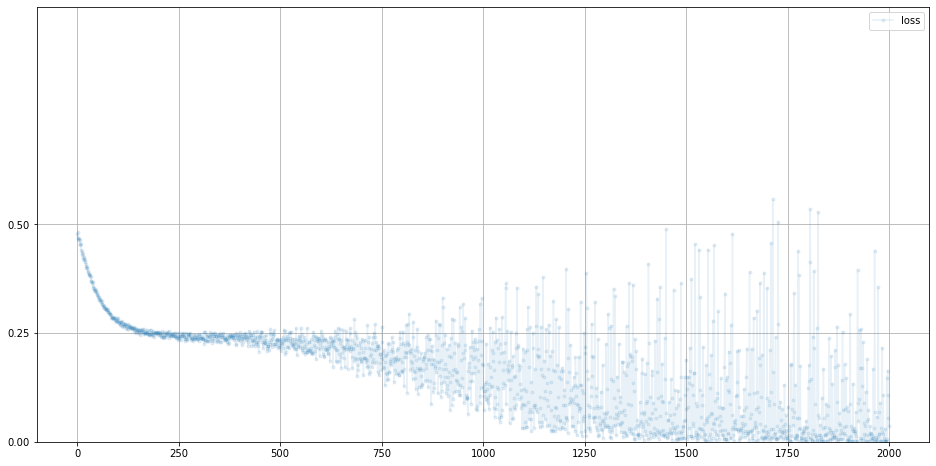

In [9]:
# plot discriminator loss

D.plot_progress()

In [10]:
# manually run discriminator to check it can tell real data from fake

print( D.forward( generate_real() ).item() )
print( D.forward( generate_random(4) ).item() )

0.7600593566894531
0.28176236152648926


## 生成器网络

生成器相当于反鉴别器，       

    self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )。

In [11]:
# generator class

class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        # create optimiser, simple stochastic gradient descent
        ## parameters(memo=None): 返回一个 包含模型所有参数 的迭代器。一般用作optimizer参数
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
        pass
    
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator 
        d_output = D.forward(g_output)   ## ⭐⭐⭐⭐⭐⭐⭐⭐ g 和 d 的本质区别
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

## 测试生成器输出

In [12]:
# check the generator output is of the right type and shape

G = Generator()

G.forward(torch.FloatTensor([0.5]))

tensor([0.4615, 0.6857, 0.4632, 0.3415], grad_fn=<SigmoidBackward0>)

## 开始训练 GAN 模型

In [13]:
%%time 

# create Discriminator and Generator

D = Discriminator()
G = Generator()

image_list = []

# train Discriminator and Generator

for i in range(10000):
    
    # train discriminator on true
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    # train discriminator on false
    # 使用 detach() 所以不计算 G 中的梯度
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    
    # train generator
    ## 需要注意的是这里输入的标签为1，也就是 gen 中的 loss 计算的是 d_output 和 1 之间的差距，因为你要让生成器生成的数据越来越接近真是数据，
    ## 那么你要让损失越来越小，你只有让鉴别器的输出值越来越接近1，所以这样才能保证gen向鉴别器识别错误的方向去更新。
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    
    # add image to list every 1000
    if (i % 1000 == 0):
      image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy() )

    pass

outputs:  tensor([0.3878], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3921], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3874], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3927], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3890], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3882], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3937], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3885], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3943], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3897], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3948], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3902], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.4260], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4273], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4261], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4277], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4266], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4281], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4254], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4285], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4268], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4289], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4266], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4293], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4296], grad_fn=<Sigmo

outputs:  tensor([0.4576], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4563], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4577], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4566], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4586], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4568], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4581], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4571], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4593], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4573], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4591], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4576], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4590], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4755], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4798], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4756], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4796], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4758], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4808], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4759], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4814], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4761], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4806], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4762], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4795], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4764], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4863], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4917], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4864], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4916], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4865], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4866], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4907], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4867], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4924], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4868], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4924], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4936], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5001], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4937], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5036], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4937], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5022], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4938], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5016], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4938], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5031], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4939], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5023], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4939], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5052], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4975], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5047], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4975], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5098], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4976], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5086], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4976], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5071], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4976], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5070], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5075], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5102], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4996], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5116], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4996], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4996], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5109], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4996], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5132], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4996], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5101], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4997], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5126], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5165], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5140], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5161], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5125], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5133], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5007], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5144], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5007], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.5009], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5169], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5009], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5181], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5008], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5137], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5009], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5151], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5009], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5151], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5009], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5168], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5009], grad_fn=<Sigmo

outputs:  tensor([0.5200], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5171], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5159], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5168], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5152], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5176], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5181], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5177], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5001], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5183], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5001], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5176], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5001], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5194], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5001], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5178], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5001], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5192], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5001], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5222], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5201], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4994], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5192], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4994], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5199], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4994], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5170], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4994], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5206], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4994], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5232], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4993], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5186], grad_fn=<Sigmo

outputs:  tensor([0.5216], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4985], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5207], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4985], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5245], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4985], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5209], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4985], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5234], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4984], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5190], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4984], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5262], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5206], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5211], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5219], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5214], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5238], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5250], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4976], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5252], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4966], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5210], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4966], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5268], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4966], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5217], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4966], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5225], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4966], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5255], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4966], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5246], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5259], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5224], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5228], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5313], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5242], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5240], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4954], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5268], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4944], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5230], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4944], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5280], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4944], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5298], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4944], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5262], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4944], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5299], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4943], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5270], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5320], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5337], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5281], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5236], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5306], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4931], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5302], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4931], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5255], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5347], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5229], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5335], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5322], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5313], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4918], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5373], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4918], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5256], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4908], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5312], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4908], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5332], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4908], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5424], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4907], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5307], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4907], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5260], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4907], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5306], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4907], grad_fn=<Sigmo

outputs:  tensor([0.5314], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5384], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5351], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5325], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5393], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5314], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4894], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5368], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4882], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5378], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4882], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5324], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4882], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5315], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4882], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5294], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4882], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5339], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4882], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5452], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4881], grad_fn=<Sigmo

outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5368], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5351], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5320], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5307], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5389], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5373], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4856], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5410], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4856], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5452], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4855], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5414], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4855], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5395], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4855], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5385], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4855], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5366], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4855], grad_fn=<Sigmo

outputs:  tensor([0.5449], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4844], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5359], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4844], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5393], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4843], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5453], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4843], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5458], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4843], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5446], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4843], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5358], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5407], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4832], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5514], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4832], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5419], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4831], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5457], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4831], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5299], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4831], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5383], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4831], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5466], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5442], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5419], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5440], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5392], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5368], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5371], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5441], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5469], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4810], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5522], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4809], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5333], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4810], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5288], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4810], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5543], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4810], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5533], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4809], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5445], grad_fn=<Sigmo

outputs:  tensor([0.5419], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4801], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5432], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4801], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5452], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4801], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5476], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4800], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5524], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4800], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5428], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4800], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5415], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5414], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4792], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5407], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4792], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5364], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4792], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5590], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4792], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5429], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4792], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5436], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4792], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5513], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5493], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5449], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5388], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5368], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5524], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5388], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4786], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4775], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5499], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4774], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5413], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4775], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5467], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4775], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5541], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4774], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5451], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4774], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5611], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4774], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5545], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5515], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4766], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5540], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4766], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5492], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4766], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5434], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4766], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5466], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4766], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5542], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5398], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4755], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5495], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4755], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5693], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4755], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5403], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4755], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5502], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4755], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5472], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4755], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5591], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5488], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4744], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5404], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4744], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5357], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4744], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5648], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4744], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5597], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5571], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4743], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5453], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4737], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5469], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4737], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5528], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4737], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5472], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4737], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5715], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4736], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5601], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4736], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5435], grad_fn=<Sigmo

outputs:  tensor([0.4735], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5501], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4735], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5444], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4735], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5686], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4735], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5451], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4735], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5555], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4735], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5502], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4735], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5369], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4733], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5565], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4733], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5477], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4734], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5516], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4734], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5608], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4733], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5530], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4733], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5530], grad_fn=<Sigmo

outputs:  tensor([0.5592], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4729], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5478], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4729], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5332], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4730], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5646], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4730], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5516], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4730], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5381], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4730], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5663], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5620], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5534], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5425], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5770], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5531], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5484], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5466], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5515], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5343], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4728], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5615], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5663], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5494], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4727], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5447], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4728], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5631], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4725], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5615], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4725], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5645], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4725], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5504], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4725], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5414], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4726], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5600], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4726], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5639], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4725], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5276], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4734], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5672], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4734], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5558], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4734], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5643], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4734], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5769], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4733], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5693], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4732], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5479], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5584], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5555], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5607], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5483], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5527], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4743], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5448], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4743], grad_fn=<Sigmo

outputs:  tensor([0.4747], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5450], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4747], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5519], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4747], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5614], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4747], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5339], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4748], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5645], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4747], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5495], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4747], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5694], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4752], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5553], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4751], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5301], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4752], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5349], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4753], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5589], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4753], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5295], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4753], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5613], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4758], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5406], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4759], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5508], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4759], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5298], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4760], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5633], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4759], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5365], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4760], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5613], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4760], grad_fn=<Sigmo

outputs:  tensor([0.4767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5524], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5577], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5233], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4768], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5583], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4768], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5541], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5756], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4767], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5440], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4779], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5475], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4779], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5440], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4779], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5607], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4779], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5633], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4778], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5425], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4779], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5280], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5302], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4790], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5466], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4790], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5672], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4789], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5596], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4788], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5546], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4788], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5439], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4788], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5531], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4795], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5616], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4794], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5201], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4795], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5395], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4795], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5565], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4795], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5267], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4796], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5364], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4796], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5412], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4803], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5374], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4804], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5369], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4804], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5464], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4804], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5504], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4804], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5445], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4804], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5755], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5237], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4813], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4814], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5483], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4814], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5120], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4815], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5632], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4815], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5197], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4816], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5386], grad_fn=<Sigmo

outputs:  tensor([0.4827], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5283], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4827], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5399], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4828], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5260], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4828], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5459], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4828], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5146], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4829], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5277], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4830], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4837], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5320], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4837], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5205], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4838], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5424], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4838], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5439], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4838], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5149], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4838], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5317], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4839], grad_fn=<Sigmo

outputs:  tensor([0.4852], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5561], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4851], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4853], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5421], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4852], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5329], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4853], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5205], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4853], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5260], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4854], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5468], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4857], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5169], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4857], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5384], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4857], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5269], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4858], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5245], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4858], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5261], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4859], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5237], grad_fn=<Sigmo

outputs:  tensor([0.4872], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5572], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4871], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4979], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4872], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5345], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4872], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4873], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5162], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4874], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5351], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4874], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5199], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4883], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5158], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4883], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5010], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4884], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5475], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4884], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4884], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5242], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4885], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5150], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.4894], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5232], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4894], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5173], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5616], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4894], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5024], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5356], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4895], grad_fn=<Sigmo

outputs:  tensor([0.5560], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4902], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5381], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4902], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5162], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4902], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5350], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4902], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4934], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4903], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5074], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4904], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5253], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5357], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4917], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4792], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5235], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4920], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5214], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4921], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5245], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4921], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5110], grad_fn=<Sigmo

outputs:  tensor([0.5278], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4916], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4933], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5353], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4933], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5176], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4933], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5570], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5308], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5276], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4941], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5281], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4940], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5368], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4940], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4949], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4941], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5404], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4940], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5294], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4940], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5265], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4940], grad_fn=<Sigmo

outputs:  tensor([0.4947], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4947], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4891], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4948], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4948], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4966], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4949], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4950], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5201], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4950], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5018], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4969], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5136], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4969], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4966], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4970], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5266], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4970], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5057], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4970], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4864], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4971], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5061], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4970], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4840], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4971], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4971], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4997], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4971], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5388], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4971], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5131], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4971], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5145], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4971], grad_fn=<Sigmo

outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4965], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5366], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4994], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5181], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5369], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5065], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4987], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5446], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4986], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5040], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4986], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5148], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4986], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4987], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5184], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4987], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5404], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4986], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4986], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5228], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4985], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5003], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4986], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4939], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4986], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4915], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4987], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5000], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4987], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5128], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4987], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4998], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5021], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4998], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5134], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4998], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5061], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4998], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4744], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4999], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5168], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4999], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4911], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5012], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5074], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5012], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4923], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5012], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5012], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4893], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5013], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5268], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5012], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5216], grad_fn=<Sigmo

outputs:  tensor([0.5014], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5014], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5145], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5014], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5015], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5014], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4886], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5015], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5180], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5014], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5154], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5014], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5019], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5164], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5019], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4943], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5019], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5400], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5018], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5125], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5018], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5013], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5019], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5062], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5019], grad_fn=<Sigmo

outputs:  tensor([0.4826], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5020], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4882], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5021], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5181], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5021], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5067], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5021], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4987], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5021], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5234], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5021], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5159], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5188], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5024], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4912], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5024], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4735], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5025], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5011], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5026], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5019], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5026], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4965], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5026], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5066], grad_fn=<Sigmo

outputs:  tensor([0.5038], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4805], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5038], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4937], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5039], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4763], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5040], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5171], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5039], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4678], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5040], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5040], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4793], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5041], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5040], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4827], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5041], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4896], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5042], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4905], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5042], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5075], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5042], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4921], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5125], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5049], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4929], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5050], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5041], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5049], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5176], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5049], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4827], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5050], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5050], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5050], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5004], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.4921], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5048], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5038], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5048], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5233], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5047], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5174], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5046], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4859], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5047], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4728], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5047], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4828], grad_fn=<Sigmo

outputs:  tensor([0.5262], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5052], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4913], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5052], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4793], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5053], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4891], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5053], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4946], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5053], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5142], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5053], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5234], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4820], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5060], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4906], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5060], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4809], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5061], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5121], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5060], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4864], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5060], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4869], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5060], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5236], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5062], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5132], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5061], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4635], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5062], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4682], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5063], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4511], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5064], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4964], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5064], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4967], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5068], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4906], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5068], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4779], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5068], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5266], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5067], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5067], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5100], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5067], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4627], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5068], grad_fn=<Sigmo

outputs:  tensor([0.4713], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5074], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5074], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5074], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4863], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5074], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4498], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5075], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5075], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4939], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4891], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5080], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4884], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4435], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5082], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4747], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5082], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4783], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5080], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4874], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5080], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4908], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5080], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5310], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4962], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5065], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5079], grad_fn=<Sigmo

outputs:  tensor([0.5083], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5181], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5082], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5129], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5154], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4852], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5083], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5081], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4761], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5082], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5080], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5140], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5072], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4811], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4892], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5079], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4547], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5080], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4857], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5081], grad_fn=<Sigmo

outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4807], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4863], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4716], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5088], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4676], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5089], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4816], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5089], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4900], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5089], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5157], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4857], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4933], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4956], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4900], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5098], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5093], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<Sigmo

outputs:  tensor([0.5095], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5235], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4802], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4971], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4945], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5033], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5093], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5053], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5093], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4978], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5101], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4829], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5101], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4789], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5102], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4941], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5102], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5052], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5101], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4818], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5101], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4968], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5099], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4845], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5099], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4983], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5098], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5017], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5098], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4978], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5098], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5136], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5097], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4954], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5097], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4803], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5063], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4914], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4653], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4712], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4821], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4864], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5103], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4771], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5103], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4696], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5104], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4893], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5103], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4848], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5104], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4939], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5103], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5069], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5103], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4820], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5100], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5125], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5099], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4731], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5100], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5017], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5099], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4612], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5100], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4777], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5100], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4902], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5083], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4937], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4836], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4829], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4663], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5040], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4886], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4571], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5050], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5037], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4828], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.4938], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5104], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5134], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5104], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4805], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5104], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4635], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4974], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4871], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5250], grad_fn=<Sigmo

outputs:  tensor([0.4857], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4732], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4932], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5035], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5141], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5109], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4693], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4887], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4978], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4760], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4827], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5128], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4927], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4766], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4902], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4927], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4796], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4696], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4935], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4742], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4759], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4810], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4763], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4833], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4680], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4765], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4889], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4953], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4730], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4813], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5117], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5117], grad_fn=<Sigmo

outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4852], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4747], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4531], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5115], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4808], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5115], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4704], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5116], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4783], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5116], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4871], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4902], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4983], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4845], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5180], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5109], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4953], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5109], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4834], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4639], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4734], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4760], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4684], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4937], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4786], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5038], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4862], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4922], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5063], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5036], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4749], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5104], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4734], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5104], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4821], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4663], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4909], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4858], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5005], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4605], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4416], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5019], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5070], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5046], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4709], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4861], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4822], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5139], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4890], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4971], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5040], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5026], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4837], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4735], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4779], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4944], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4992], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5111], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5080], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4771], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5075], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4841], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4924], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5194], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5107], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4916], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.4843], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4701], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4939], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4722], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5004], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4713], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5113], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4743], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.4809], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4937], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4830], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4984], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5109], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4771], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5109], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5010], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5109], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4853], grad_fn=<Sigmo

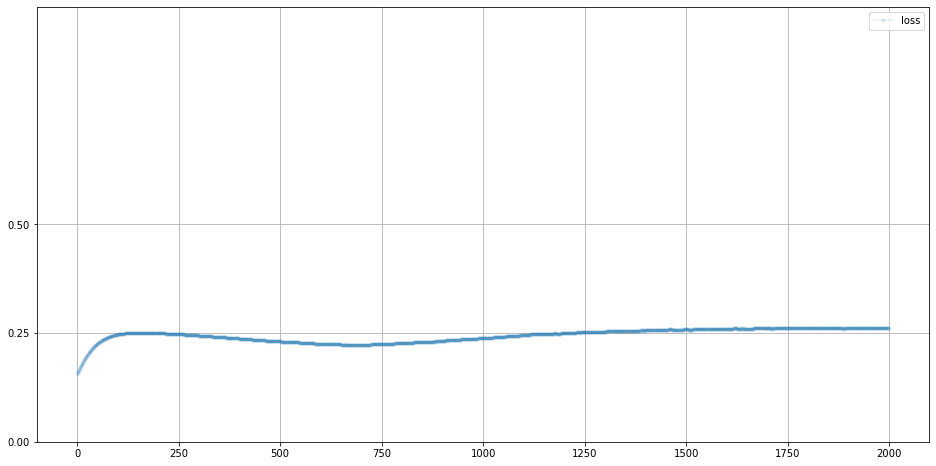

In [14]:
# plot discriminator error

D.plot_progress()

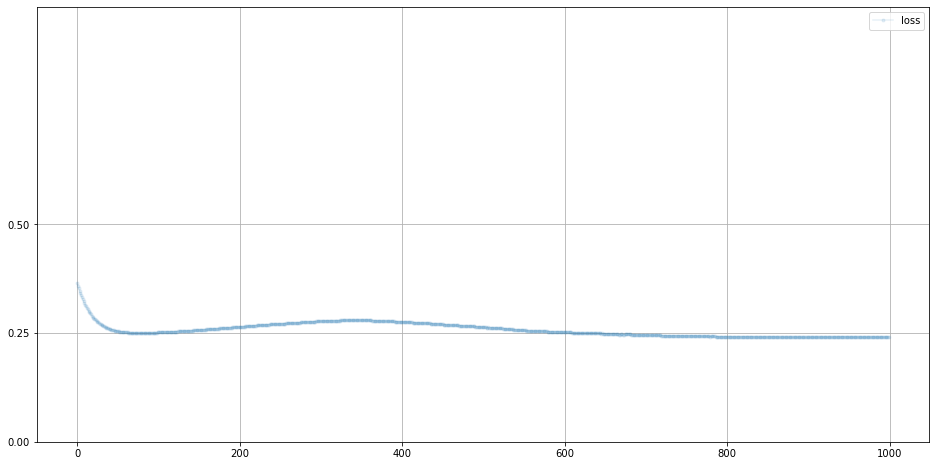

In [15]:
# plot generator error

G.plot_progress()

## 手动运行生成器

In [16]:
# manually run generator to see it's outputs

G.forward(torch.FloatTensor([0.5]))

tensor([0.9411, 0.0433, 0.9457, 0.0392], grad_fn=<SigmoidBackward0>)

In [18]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9411, 0.0433, 0.9457, 0.0392], grad_fn=<SigmoidBackward0>)

## 在训练期间可视化模式

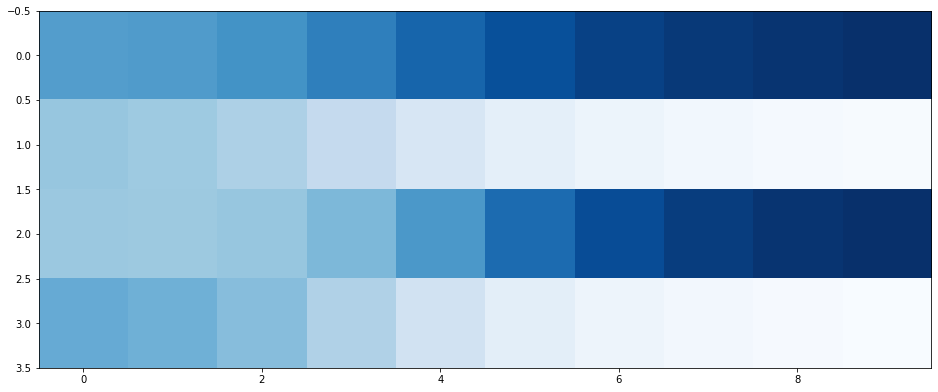

In [17]:
# plot images collected during training

plt.figure(figsize = (16,8))

plt.imshow(numpy.array(image_list).T, interpolation='none', cmap='Blues')